In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy


Using `odeint` to find a specific solution for the following ODE:

$y^{\prime}(x)=f(x, y(x))=x+y(x)^{2}$

To be able to solve this function with `odeint` we need to define a python 
function for $f(x,y(x))$ that takes python scalar or numpy arrays as input. 
This can be done using `sympy.lambdify`.

Then we should define the initial value `y0` and a numpy array with the discrete
values of $x$ for which to compute the function $y(x)$.

In [2]:
x = sympy.symbols("x")
y = sympy.Function("y")

In [3]:
f = y(x)**2 + x

In [4]:
f_np = sympy.lambdify((y(x), x), f)

In [5]:
y0 = 0
xp = np.linspace(0, 1.9, 100) # positive x
yp = integrate.odeint(f_np, y0, xp)

In [6]:
xn = np.linspace(0, -5, 100) # negative x
yn = integrate.odeint(f_np, y0, xn)

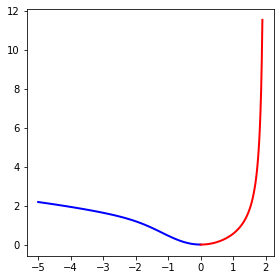

In [7]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(xn, yn, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)
fig.tight_layout()

This is an example of coupled ODE.

$x^{\prime}(t)=a x-b x y$

$y^{\prime}(t)=c x y-d y$

where $x(t)$ is the number of prey animals and $y(t)$ is the number of predator 
animals and the coefficients a, b, c, and d describe the rates of the processes 
in the model.

First we need to write the RHS of the ODE vector: 

$f\left(t,[x, y]^{T}\right)=[a x-b x y, c x y-d y]^{T}$

In [8]:
a,b,c,d = 0.4, 0.002, 0.001, 0.7

def f(xy, t):
    x,y = xy
    return [a*x-b*x*y, c*x*y-d*y]

# the first argument is an array containing the current values of x(t), and y(t)


In [9]:
xy0 = [600, 400] # 600 prey, 400 predators
t = np.linspace(0, 50, 250)
xy_t = integrate.odeint(f, xy0, t)
xy_t.shape

(250, 2)

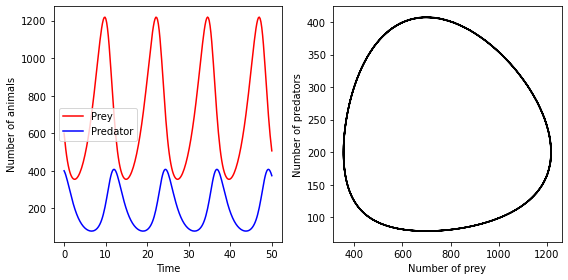

In [10]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0].plot(t, xy_t[:,0], 'r', label="Prey")
ax[0].plot(t, xy_t[:,1], 'b', label="Predator")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Number of animals")
ax[0].legend()

ax[1].plot(xy_t[:,0], xy_t[:,1], 'k')
ax[1].set_xlabel("Number of prey")
ax[1].set_ylabel("Number of predators")
fig.tight_layout()

An example of Lorenz equation when the function on the RHS takes arguments.

The ODEs are:

$x^{\prime}(t)=\sigma(y-x), y^{\prime}(t)=x(\rho-z)-y, z^{\prime}(t)=x y-\beta z$

The solution depends strongly to the values of $\sigma, \rho,$ and $\beta$. 

In [11]:
def f(xyz, t, sigma, rho, beta):
    x, y, z = xyz
    return [sigma*(y-x), x*(rho-z), x*y-beta*z]

In [12]:
sigma, rho, beta = 8, 28, 8/3.0

In [16]:
t = np.linspace(0, 25, 10000)
xyz0 = [1.0, 1.0, 1.0]

In [17]:
xyz1 = integrate.odeint(f, xyz0, t, args=(sigma, rho, beta))
xyz2 = integrate.odeint(f, xyz0, t, args=(sigma, rho, 0.6*beta))
xyz3 = integrate.odeint(f, xyz0, t, args=(2*sigma, rho, 0.6*beta))

In [18]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

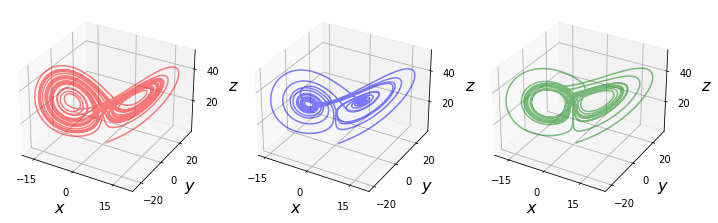

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4), subplot_kw={'projection': '3d'})
for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])